### 1. Carregar o ficheiro “Dados_Trabalho_TP2.csv” para o ambiente do Python, verifique a sua dimensão e obtenha um sumário dos dados

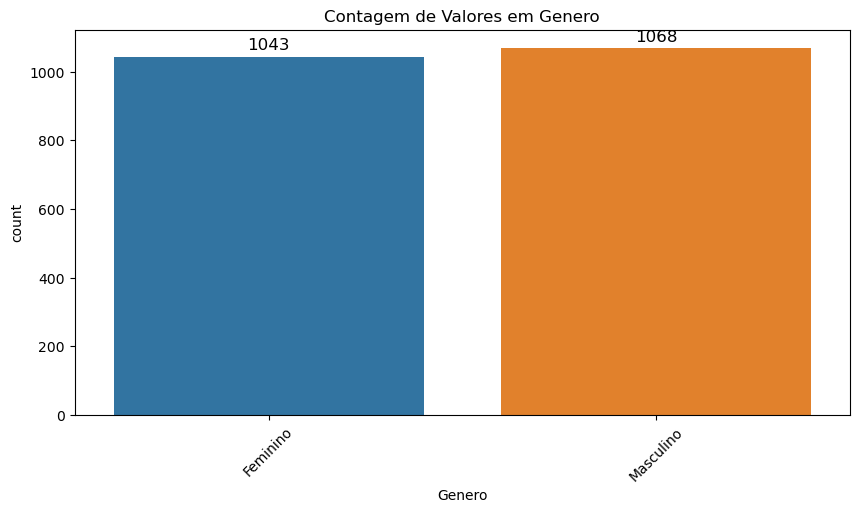

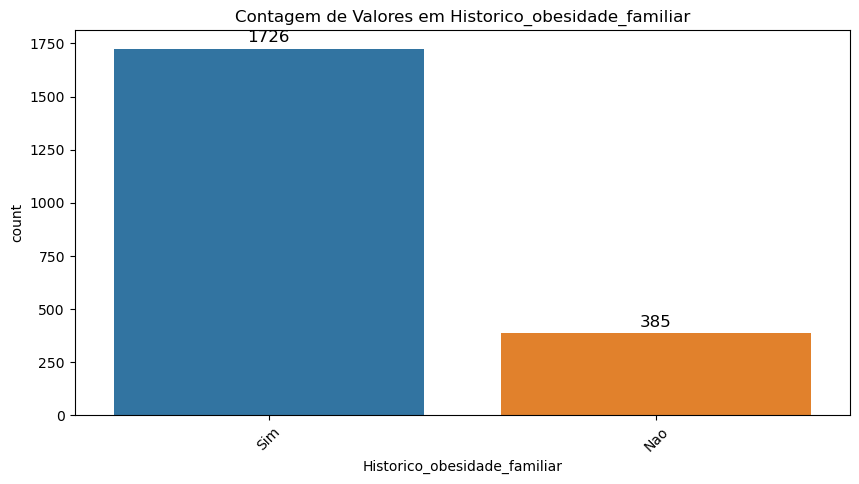

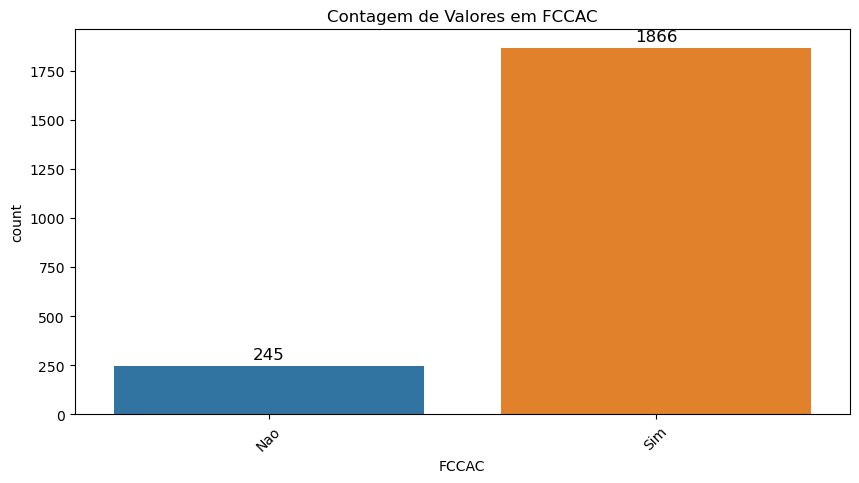

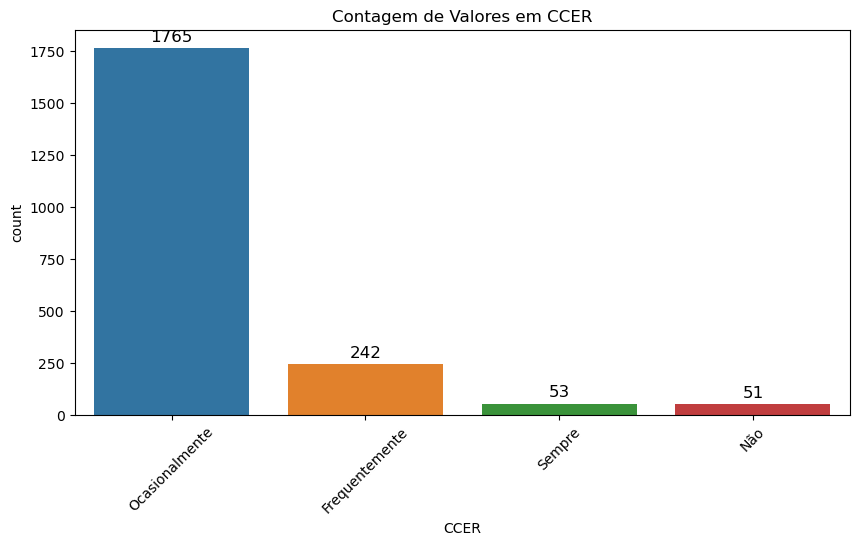

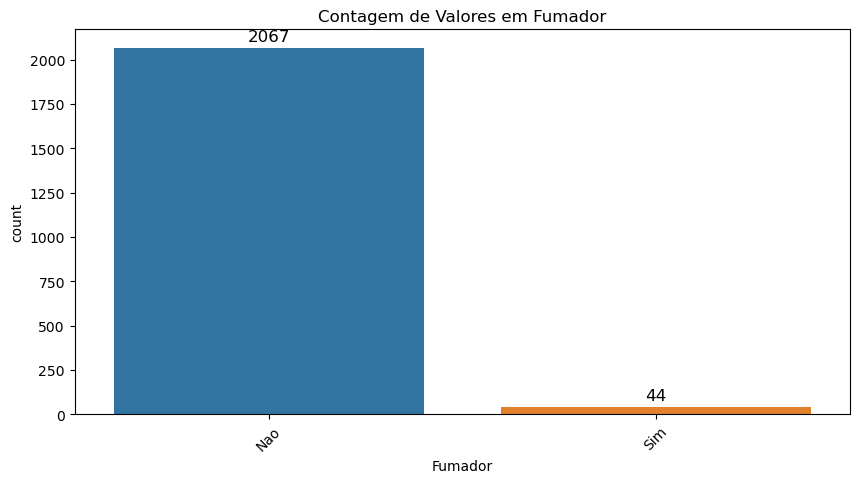

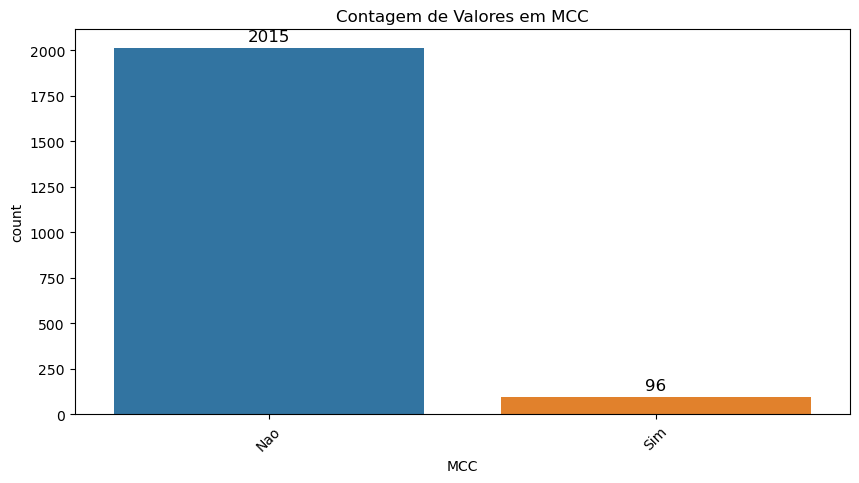

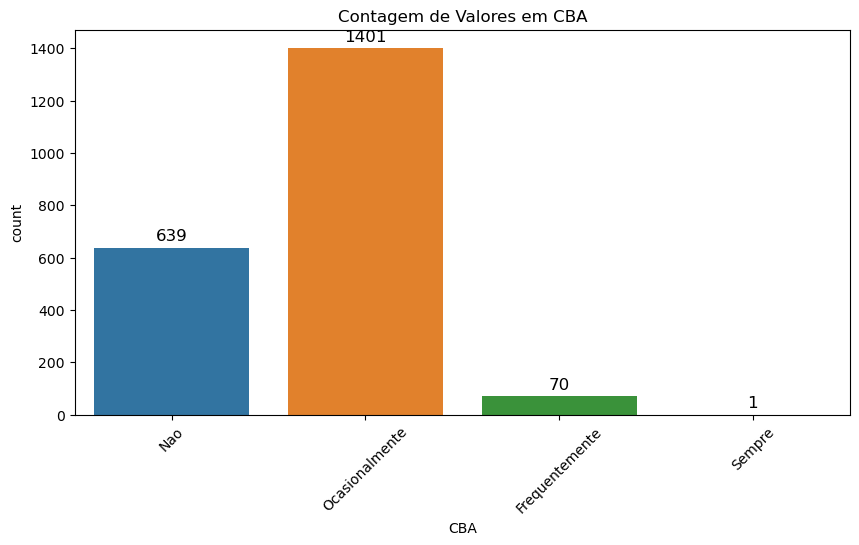

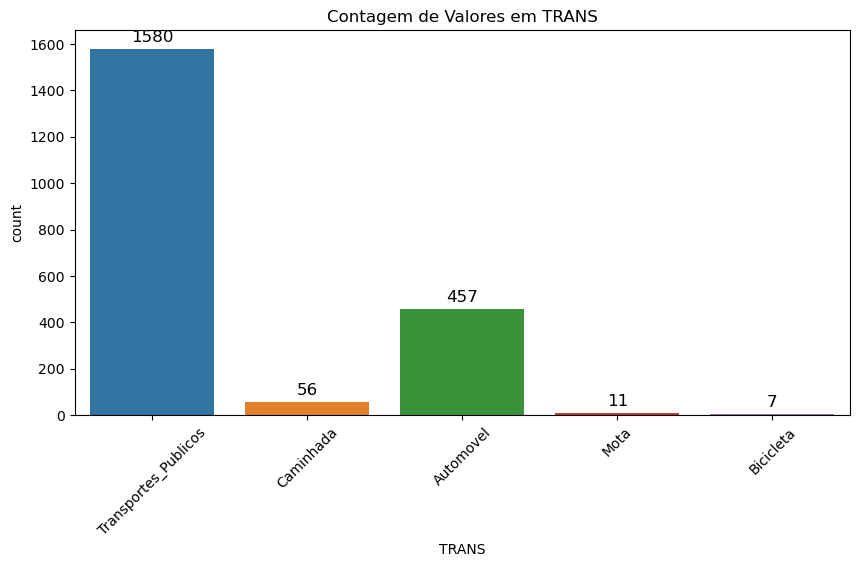

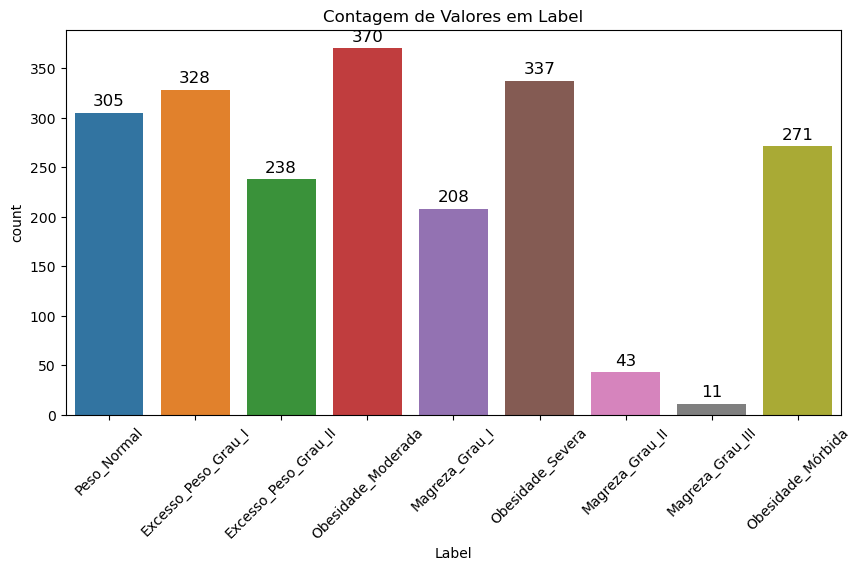

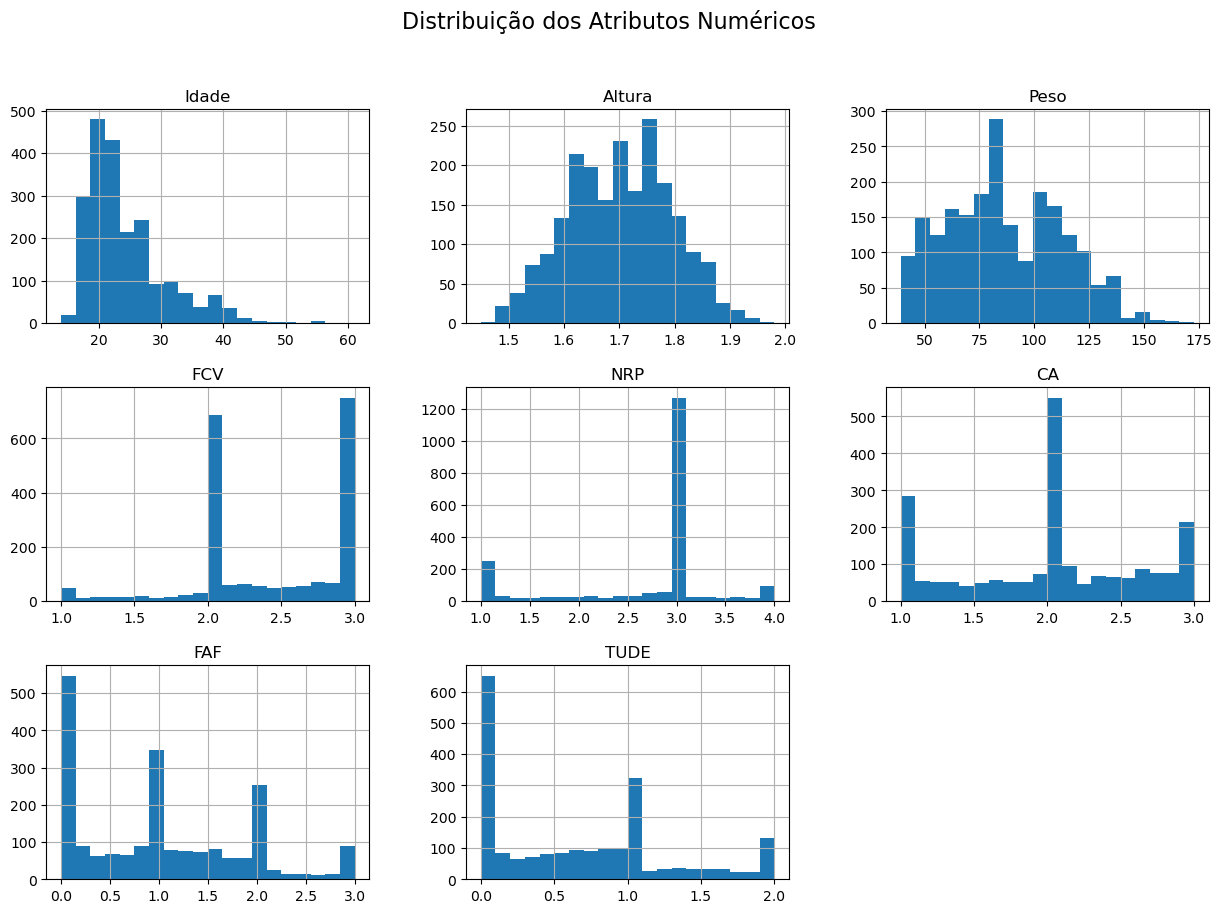

(2111, 17)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o ficheiro
file_path = 'Dados_Trabalho_TP2.csv'
data = pd.read_csv(file_path)

# Remover a coluna 'Unnamed: 0' dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Verifica dimensões
dimensions = data_cleaned.shape

# Função para exibir resumo dos atributos categóricos
def display_categorical_summary_with_values(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        ax = sns.countplot(data=df, x=col)
        plt.title(f'Contagem de Valores em {col}')
        plt.xticks(rotation=45)
        
        # Adicionar os valores absolutos sobre as barras de forma a ficarem centrados por cima das mesmas
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'baseline',
                        fontsize = 12, color = 'black', rotation = 0, xytext = (0, 5), 
                        textcoords = 'offset points')
        
        plt.show()

display_categorical_summary_with_values(data_cleaned)

# Função para exibir resumo dos atributos numéricos
def display_numerical_summary(df):
    numerical_columns = df.select_dtypes(include=['number']).columns
    df[numerical_columns].hist(figsize=(15, 10), bins=20)
    plt.suptitle('Distribuição dos Atributos Numéricos', fontsize=16)
    plt.show()

display_numerical_summary(data_cleaned)

dimensions

### 2. Exercício de IMC.

Valores ausentes por coluna:
 Genero                          0
Idade                           0
Altura                          0
Peso                            0
Historico_obesidade_familiar    0
FCCAC                           0
FCV                             0
NRP                             0
CCER                            0
Fumador                         0
CA                              0
MCC                             0
FAF                             0
TUDE                            0
CBA                             0
TRANS                           0
Label                           0
IMC                             0
dtype: int64
Estatísticas descritivas:
              Idade       Altura         Peso          FCV          NRP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000    

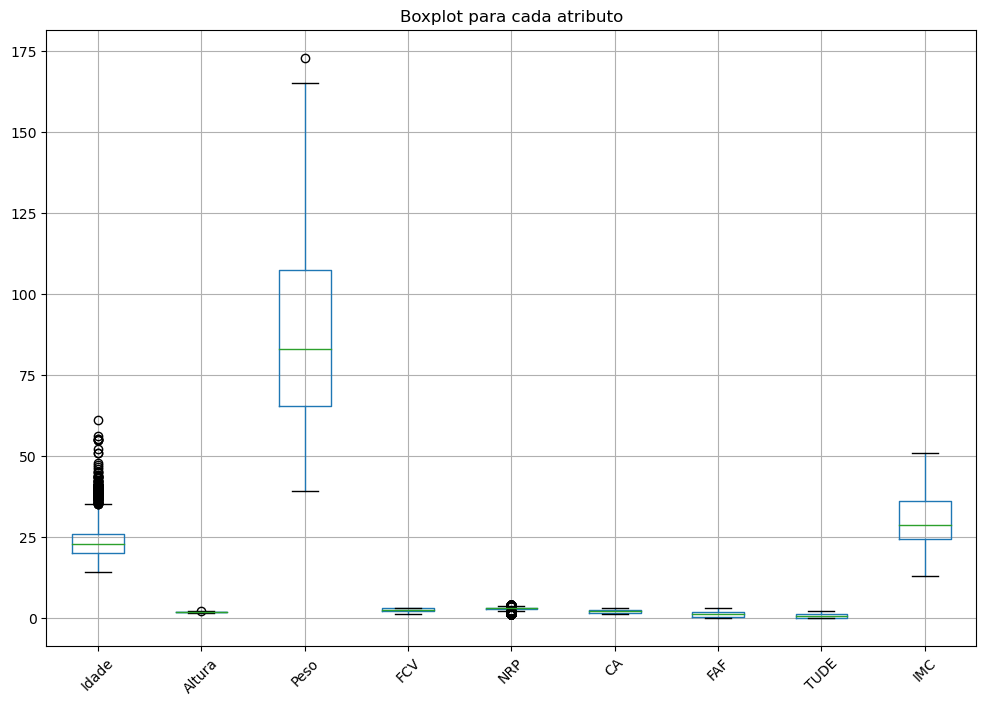

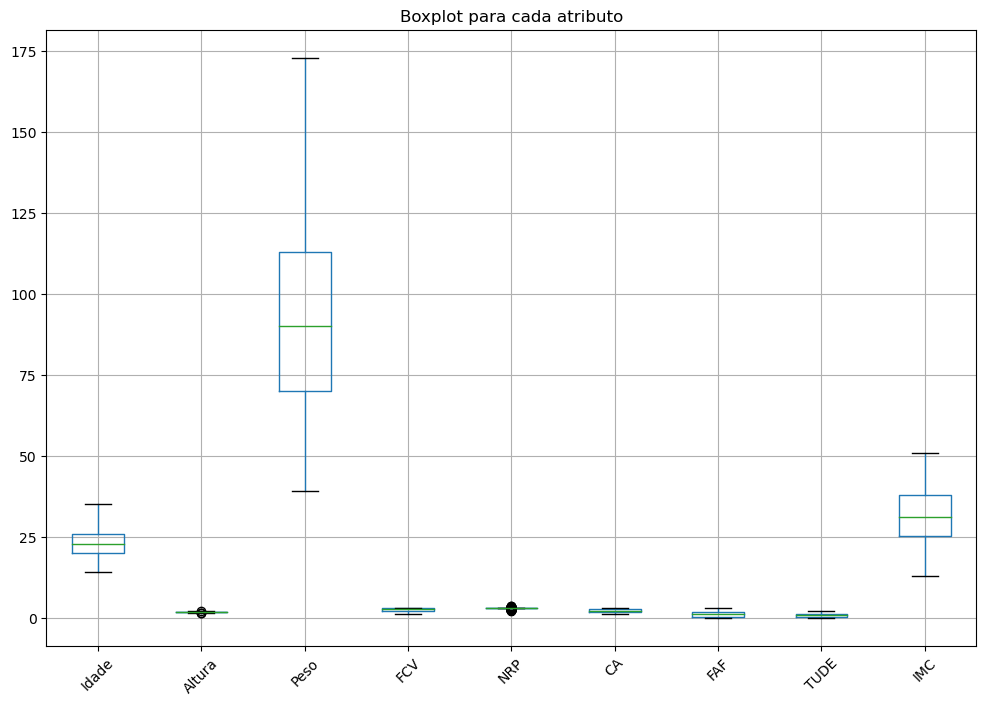

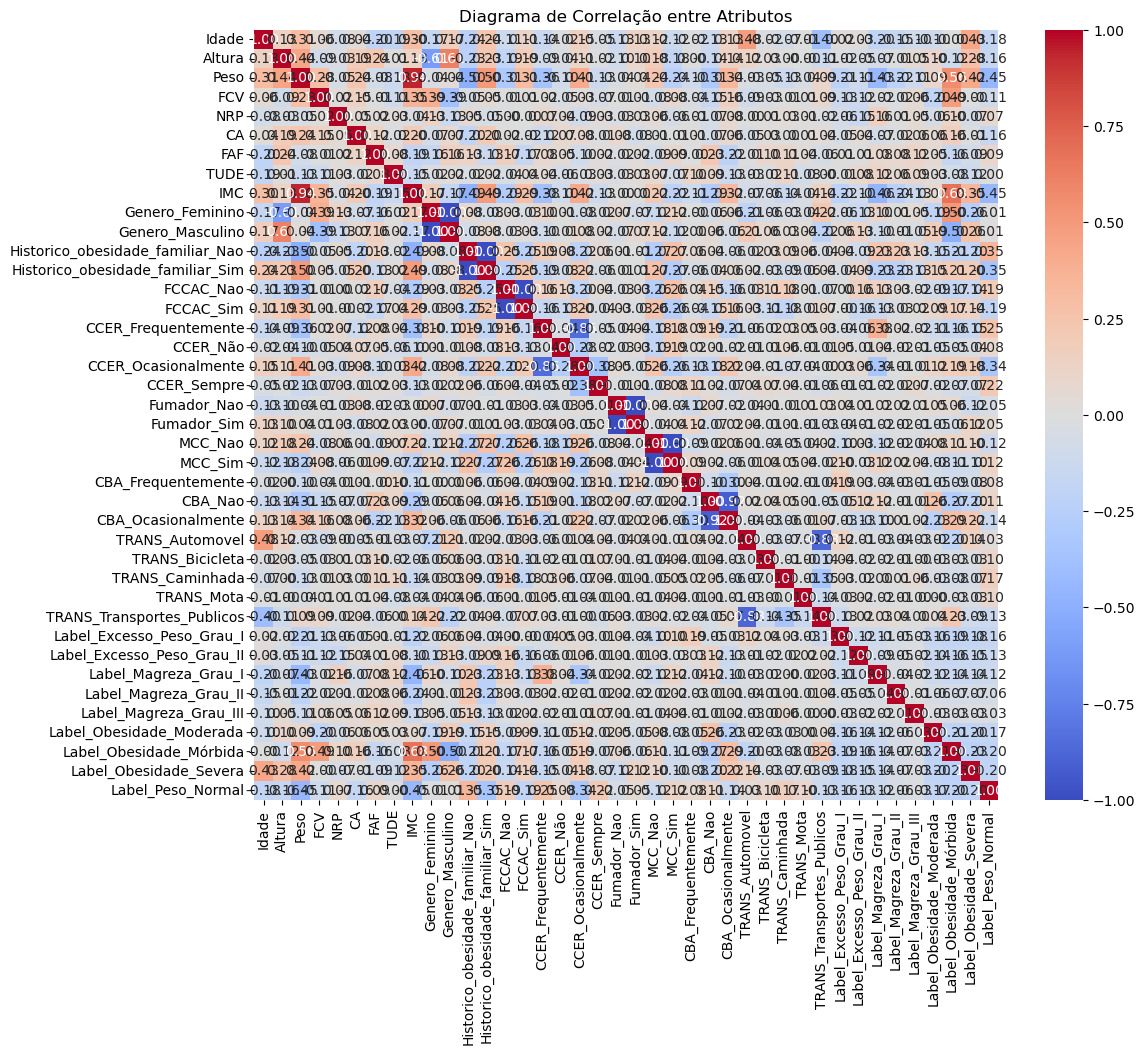

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
2106,Feminino,20.976842,1.710730,131.408528,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,1.748584,133.742943,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,1.752206,133.689352,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,1.739450,133.346641,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535
2110,Feminino,23.664709,1.738836,133.472641,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.863513,Nao,1.026452,0.714137,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.144338


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o ficheiro
file_path = 'Dados_Trabalho_TP2.csv'
data = pd.read_csv(file_path)

# Remover a coluna 'Unnamed: 0' dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])
data_cleaned['IMC'] = data_cleaned['Peso'] / (data_cleaned['Altura'] ** 2)

# Identificar valores NA
missing_values = data_cleaned.isna().sum()
print("Valores ausentes por coluna:\n", missing_values)

# Se houver valores NA, limpa-se os respetivos valores
## data = data.dropna()


# Estatísticas descritivas
data_desc = data_cleaned.describe()
print("Estatísticas descritivas:\n", data_desc)

# Plotar boxplots para cada atributo num só gráfico
plt.figure(figsize=(12, 8))
data_cleaned.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot para cada atributo")
plt.show()

#Plotar boxplots para cada atributo individualmente
#sns.boxplot(data = data, x = 'Idade')
#sns.boxplot(data = data, x = 'Altura')
#sns.boxplot(data = data, x = 'Peso')
#sns.boxplot(data = data, x = 'FCV')
#sns.boxplot(data = data, x = 'NRP')
#sns.boxplot(data = data, x = 'CA')
#sns.boxplot(data = data, x = 'FAF')
#sns.boxplot(data = data, x = 'TUDE')
#sns.boxplot(data = data, x = 'IMC')


def remove_outliers(data_cleaned, column):
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_cleaned[(data_cleaned[column] > lower_bound) & (data_cleaned[column] < upper_bound)]

data_cleaned = remove_outliers(data_cleaned, 'Idade')
data_cleaned = remove_outliers(data_cleaned, 'Peso')
data_cleaned = remove_outliers(data_cleaned, 'Altura')
data_cleaned = remove_outliers(data_cleaned, 'NRP')

def normalize(y):
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    return y_norm

data_norm = data_cleaned.drop(['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC', 'CCER', 'CBA', 'TRANS', 'Label'], axis=1)
data_norm = data_norm.apply(normalize)
data_norm.describe()


# Plotar boxplots para cada atributo num só gráfico
plt.figure(figsize=(12, 8))
data_cleaned.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot para cada atributo")
plt.show()


# Converter variáveis categóricas em numéricas usando codificação one-hot
data_encoded = pd.get_dummies(data_cleaned)

# Calcular a matriz de correlação
correlation_matrix = data_encoded.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Diagrama de Correlação entre Atributos")
plt.show()


data_cleaned.head()
data_cleaned.tail()

### 3. Analise os atributos do conjunto de dados mais significativos, usando gráficos, análises estatísticas e/ou outros métodos apropriados.

Para isto, vamos considerar 3 pontos chave neste exercício (Excluindo a **análise de correlação** pois esta será realizada posteriormente no exercício 5):

- Análise de variância ANOVA (Não essencial, mas interessante de incluir)
- Importância dos atributos
- Gráficos de dispersão (de acordo com os atributos mais importantes)
- Histogramas
- Box Plot

Resultados da ANOVA:
                                            F-Value                  P-Value
CCER                           [19.398510499001382]  [2.090575205539626e-12]
TRANS                           [5.037999314408769]  [0.0004847024148367186]
CBA                             [5.784851485789964]  [0.0006167280291304742]
Fumador                        [10.603282470199131]  [0.0011467622848572783]
FCCAC                           [8.961347665133983]  [0.0027895552284687274]
Historico_obesidade_familiar   [7.5628096572452135]    [0.00600936243367532]
MCC                             [4.288051557032167]    [0.03850252857913957]
Genero                        [0.06547622316994745]     [0.7980659647569242]
Importância dos Atributos:
                             Feature    Importance
2                               Peso  8.816038e-01
8                    Genero_Feminino  6.407036e-02
1                             Altura  4.833923e-02
0                              Idade  3.284565e-03
6   

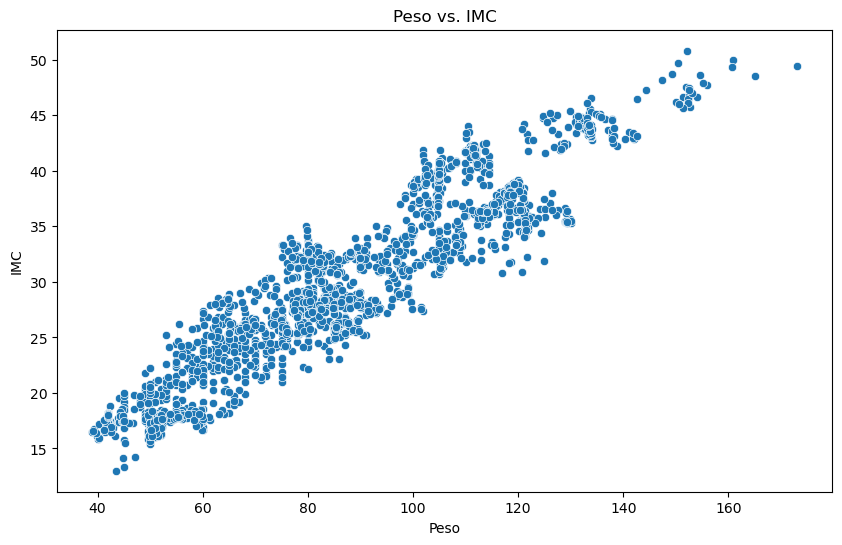

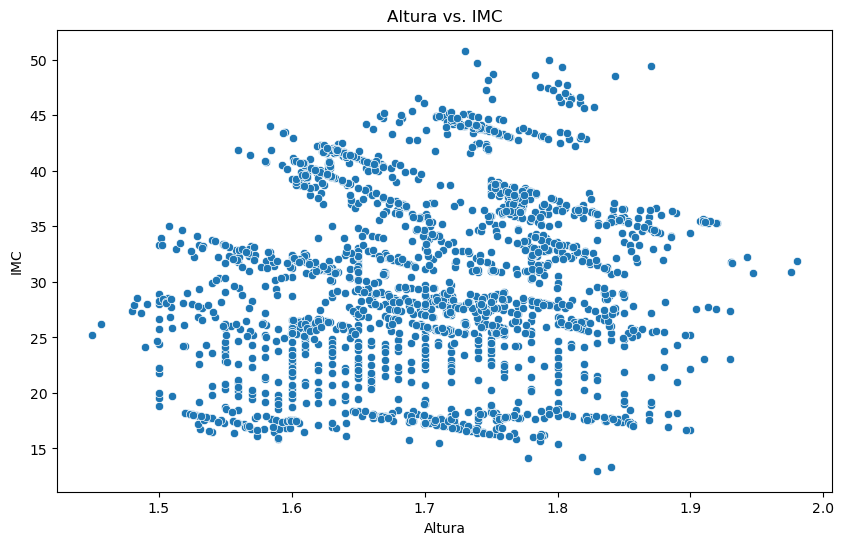

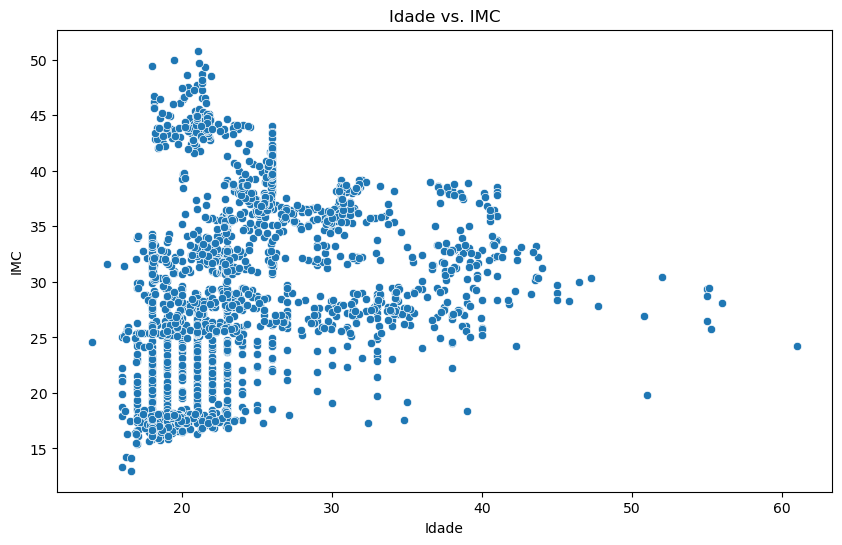

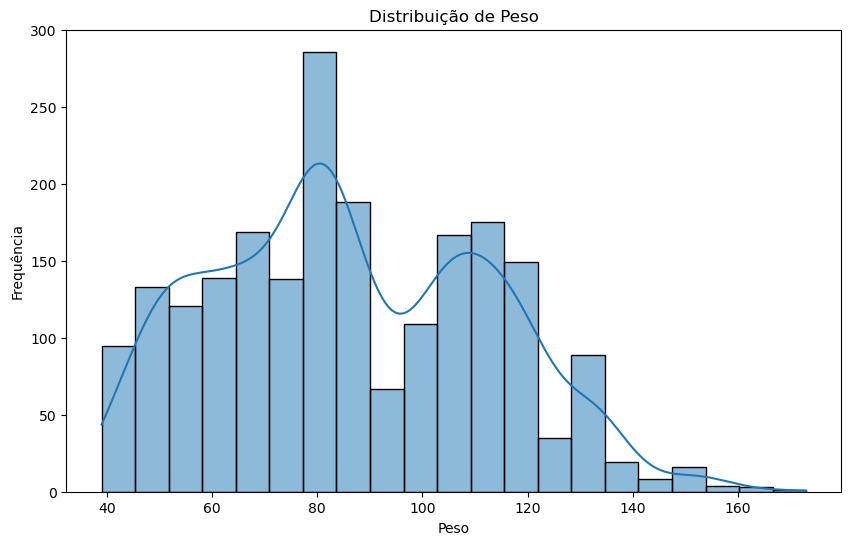

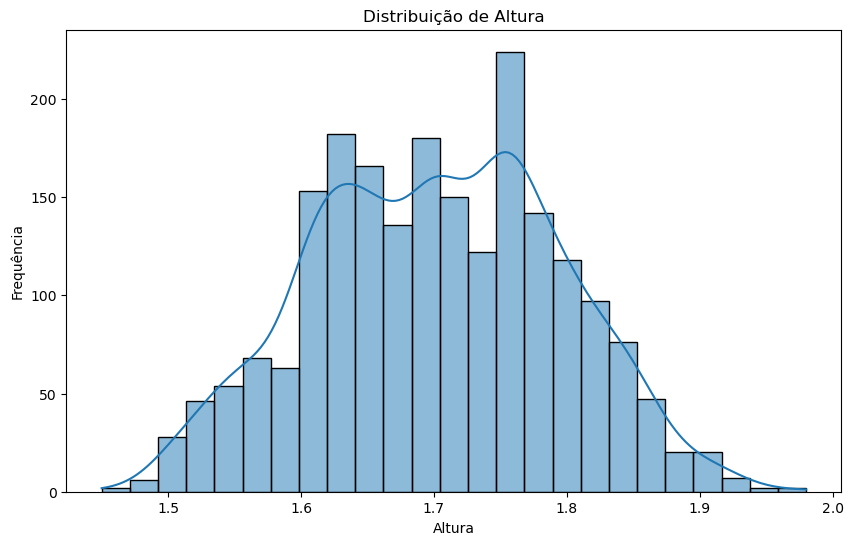

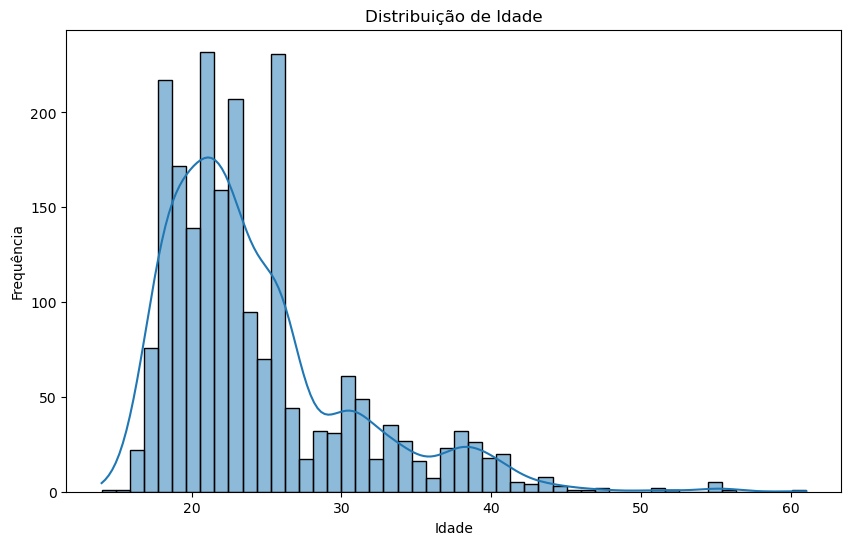

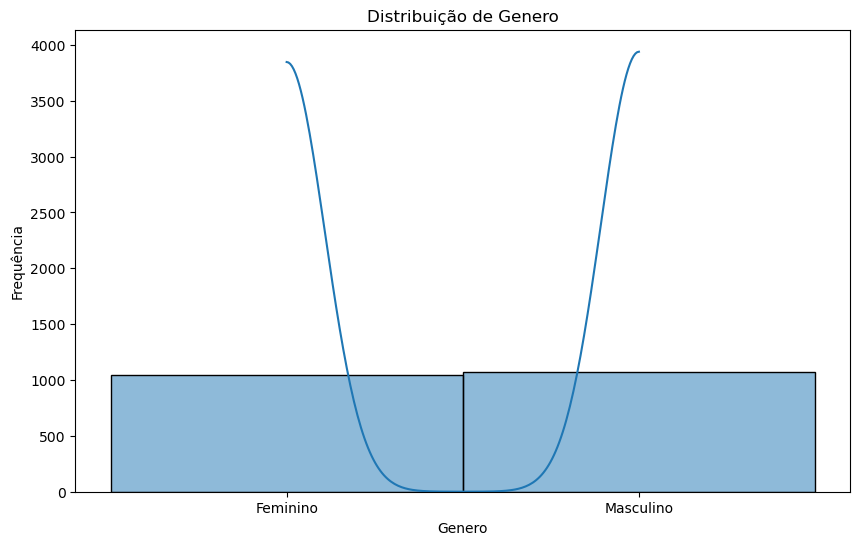

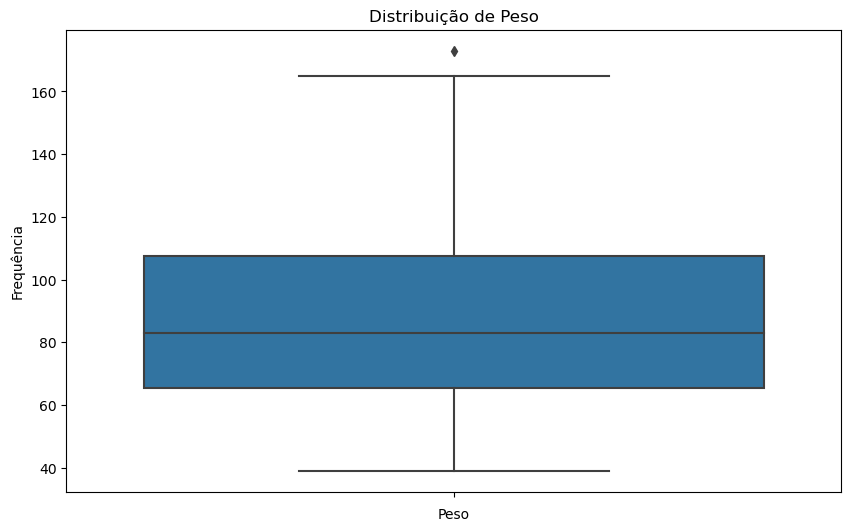

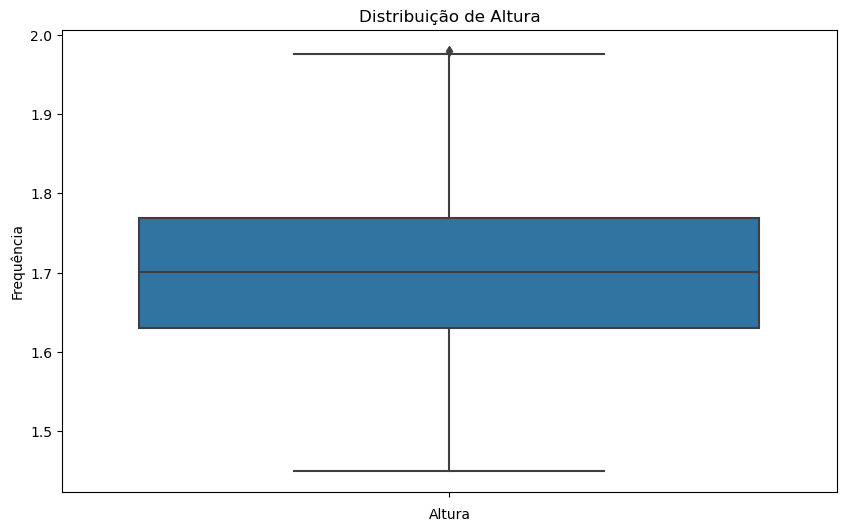

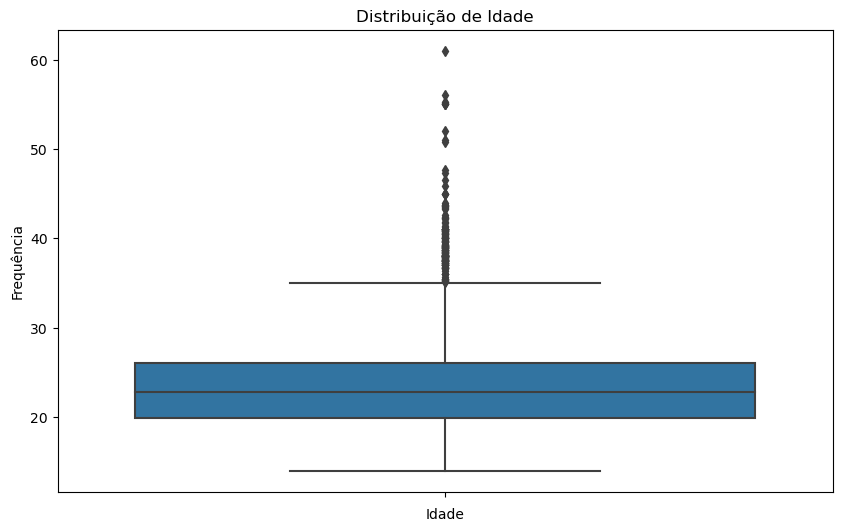

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_oneway
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm

# Carregar o ficheiro
file_path = 'Dados_Trabalho_TP2.csv'
data = pd.read_csv(file_path)

# Remover a coluna 'Unnamed: 0' dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])
data_cleaned['IMC'] = data_cleaned['Peso'] / (data_cleaned['Altura'] ** 2)

# Codificar a coluna "Label" para valores numéricos
data_encoded = data_cleaned.copy()
data_encoded['Label'] = data_encoded['Label'].astype('category').cat.codes

# Função para realizar ANOVA entre cada atributo categórico e a 'Label'
def anova_test(data_cleaned, label):
    categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
    anova_results = {}
    for col in categorical_columns:
        groups = [data_cleaned[data_cleaned[col] == category][label] for category in data_cleaned[col].unique()]
        f_val, p_val = f_oneway(*groups)
        anova_results[col] = {'F-Value': f_val, 'P-Value': p_val}
    return pd.DataFrame(anova_results).T

# Realizar ANOVA entre atributos categóricos e 'Label'
anova_results = anova_test(data_encoded, 'Label')
anova_results = anova_results.sort_values(by='P-Value')

print("Resultados da ANOVA:")
print(anova_results)

# Identificar colunas categóricas e numéricas para realizar a análise da importância dos dados para "IMC"
# Como IMC é um valor numérico, o decision tree regressor é a melhor àrvore de decisão para a análise (não vamos analisar "label")
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns.drop('Label')
numeric_columns = data_cleaned.select_dtypes(include=['number']).columns.drop('IMC')

# Preparar a transformação das respetivas colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Criar um pipeline com o preprocessor e o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

# Definir X e y (onde y é o nosso IMC)
X = data_cleaned.drop(columns=['IMC', 'Label'])
y = data_cleaned['IMC']

# Treinar o modelo (apenas usar o fit)
pipeline.fit(X, y)

# Extrair o modelo treinado e a importância dos atributos
model = pipeline.named_steps['model']
importances = model.feature_importances_

# Extrair os nomes das novas colunas criadas pelo OneHotEncoder
feature_names = numeric_columns.tolist() + pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()

# Criar um DataFrame com a importância dos atributos
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Importância dos Atributos:")
print(importances_df)

# Obter os dados transformados para visualização
X_transformed = pipeline.named_steps['preprocessor'].transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)
X_transformed_df['IMC'] = y.values

#Realizar gráfico de dispersão (Peso em relação ao IMC)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Peso', y='IMC', data=data_cleaned)
plt.title('Peso vs. IMC')
plt.xlabel('Peso')
plt.ylabel('IMC')
plt.show()

#Realizar alguns gráficos de dispersão (Altura em relação ao IMC)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Altura', y='IMC', data=data_cleaned)
plt.title('Altura vs. IMC')
plt.xlabel('Altura')
plt.ylabel('IMC')
plt.show()

#Realizar alguns gráficos de dispersão (Idade em relação ao IMC)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Idade', y='IMC', data=data_cleaned)
plt.title('Idade vs. IMC')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.show()

#Histograma para o peso
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Peso'], kde=True)
plt.title(f'Distribuição de Peso')
plt.xlabel('Peso')
plt.ylabel('Frequência')
plt.show()

#Histograma para a altura
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Altura'], kde=True)
plt.title(f'Distribuição de Altura')
plt.xlabel('Altura')
plt.ylabel('Frequência')
plt.show()

#Histograma para idade 
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Idade'], kde=True)
plt.title(f'Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

#Histograma para o género
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Genero'], kde=True)
plt.title(f'Distribuição de Genero')
plt.xlabel('Genero')
plt.ylabel('Frequência')
plt.show()

#Boxplot para o peso
plt.figure(figsize=(10, 6))
sns.boxplot(y = data_cleaned['Peso'])
plt.title(f'Distribuição de Peso')
plt.xlabel('Peso')
plt.ylabel('Frequência')
plt.show()

#Boxplot para a altura
plt.figure(figsize=(10, 6))
sns.boxplot(y = data_cleaned['Altura'])
plt.title(f'Distribuição de Altura')
plt.xlabel('Altura')
plt.ylabel('Frequência')
plt.show()

#Boxplot para a idade
plt.figure(figsize=(10, 6))
sns.boxplot(y = data_cleaned['Idade'])
plt.title(f'Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

## Obtenha um modelo de regressão linear simples para a variável “IMC” usando o atributo relativo à “Idade” de cada registo:

### a. Apresente a função linear
### b. Visualize a reta correspondente ao modelo de regressão linear simples e o respetivo diagrama de dispersão. 


X_train size:  (1688, 1)
y_train size:  (1688,)

X_test size:  (423, 1)
y_test size:  (423,)
Função linear resultante: IMC = 22.12 + 0.31 * Idade


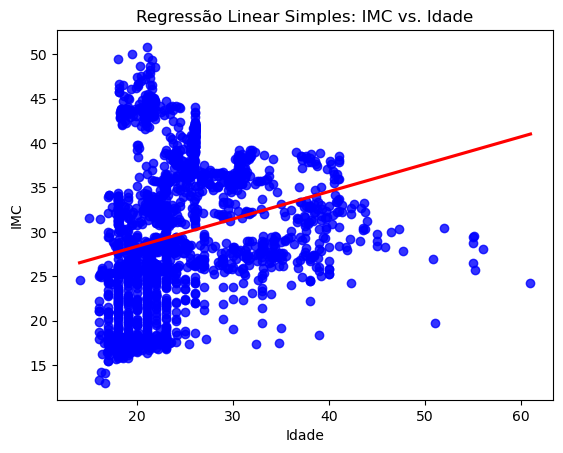

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carregar o ficheiro
file_path = 'Dados_Trabalho_TP2.csv'
data = pd.read_csv(file_path)

# Remover a coluna 'Unnamed: 0' dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])

data_cleaned['IMC'] = data_cleaned['Peso'] / (data_cleaned['Altura'] ** 2)

X = data_cleaned[['Idade']].to_numpy()
y = data_cleaned.IMC

#Quantidade de dados

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state= 100)

print("X_train size: ", X_train.shape)
print("y_train size: ", y_train.shape)
print("\nX_test size: ", X_test.shape)
print("y_test size: ", y_test.shape)

#criar e ajustar o modelo de regressão linear:
model = LinearRegression()
model.fit(X_train, y_train)

#obter coeficientes

intercept = model.intercept_
slope = model.coef_[0]

#Equação da reta
print(f"Função linear resultante: IMC = {intercept:.2f} + {slope:.2f} * Idade")

sns.regplot(x='Idade', y='IMC', data=data_cleaned, order=1, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Regressão Linear Simples: IMC vs. Idade')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.show()



### c. Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) do modelo sobre os 20% casos de teste. 


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Carregar o ficheiro
file_path = 'Dados_Trabalho_TP2.csv'
data = pd.read_csv(file_path)

# Remover a coluna 'Unnamed: 0' dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])

data_cleaned['IMC'] = data_cleaned['Peso'] / (data_cleaned['Altura'] ** 2)

X = data_cleaned[['Idade']].to_numpy()
y = data_cleaned.IMC

#Quantidade de dados

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state= 100)

print("X_train size: ", X_train.shape)
print("y_train size: ", y_train.shape)
print("\nX_test size: ", X_test.shape)
print("y_test size: ", y_test.shape)

#criar e ajustar o modelo de regressão linear:
model = LinearRegression()
model.fit(X_train, y_train)

#Avaliar o modelo
y_pred = model.predict(X_test)

#Efetuar os cálculos para o MAE
import numpy as np
MAE = np.mean(abs(y_test - y_pred))
print("MAE no set de treino: {:.3f}".format(MAE))

#Efetuar cáculos para o Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: {:.3f}".format(rmse))



X_train size:  (1688, 1)
y_train size:  (1688,)

X_test size:  (423, 1)
y_test size:  (423,)
MAE no set de treino: 6.381
MAE:  6.3808543358510965
RMSE: 7.776


### d. Teste se é possível obter um modelo de regressão linear simples com melhor resultado, utilizando outra variável dos preditores disponíveis no dataset.

In [19]:
# Reimport necessary libraries and redefine variables
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Carregar o ficheiro novamente
file_path = 'Dados_Trabalho_TP2.csv'
data = pd.read_csv(file_path)

# Remover a coluna 'Unnamed: 0' dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Adicionar coluna de IMC
data_cleaned['IMC'] = data_cleaned['Peso'] / (data_cleaned['Altura'] ** 2)

# Testar diferentes variáveis preditoras (o peso servirá para demonstrar que o valor dos preditores seriam muito melhores)
variaveis = ['Peso', 'Idade', 'FAF', 'CA']
resultados = {}

for var in variaveis:
    X = data_cleaned[[var]].to_numpy()
    y = data_cleaned.IMC

    # Separar os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

    # Criar e ajustar o modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    intercept = model.intercept_
    slope = model.coef_[0]

    #Equação da reta
    print(f"Função linear resultante: IMC = {intercept:.2f} + {slope:.2f} * ", [var])

    # Avaliar o modelo
    y_pred = model.predict(X_test)

    # Calcular MAE e RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    resultados[var] = {'MAE': mae, 'RMSE': rmse}
    
resultados

Função linear resultante: IMC = 4.91 + 0.29 *  ['Peso']
Função linear resultante: IMC = 22.12 + 0.31 *  ['Idade']
Função linear resultante: IMC = 31.25 + -1.65 *  ['FAF']
Função linear resultante: IMC = 25.54 + 2.01 *  ['CA']


{'Peso': {'MAE': 2.4052472834574106, 'RMSE': 2.9890718391140507},
 'Idade': {'MAE': 6.3808543358510965, 'RMSE': 7.775537583137655},
 'FAF': {'MAE': 6.493420807153639, 'RMSE': 7.872920501995279},
 'CA': {'MAE': 6.555815075152118, 'RMSE': 7.975215425636686}}